In [46]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Mushroom 데이터로 예측

### 데이터 가져오기, 분석

In [47]:
data = pd.read_csv("./mushrooms.csv",encoding="utf-8")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [49]:
data.describe()
# 값들이 명목변수이기 때문에 기하적모델, 선형모델은 사용 하기 힘들다.
# 명목변수를 자연수로 인코딩해주기 힘들기(0~n가지라면 컴퓨터는 순위를 매겨버릴수도 있음) 때문에 확률적모델을 쓰는게 좋다. 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [50]:
# 값 확인
data["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

### 명목변수를 자연수로 인코딩

In [51]:
def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result
    

In [52]:
for i in data.columns:
    data[i] = encoder(data[i])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [53]:
data.corrwith(data["class"])

class                       1.000000
cap-shape                  -0.112110
cap-surface                 0.169663
cap-color                  -0.042028
bruises                    -0.501530
odor                       -0.582015
gill-attachment             0.129200
gill-spacing                0.348387
gill-size                   0.540024
gill-color                 -0.412869
stalk-shape                 0.102019
stalk-root                 -0.337542
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
stalk-color-above-ring     -0.225294
stalk-color-below-ring     -0.098476
veil-type                        NaN
veil-color                  0.120766
ring-number                 0.152261
ring-type                  -0.556515
spore-print-color          -0.560715
population                 -0.155254
habitat                    -0.191297
dtype: float64

In [54]:
y= data["class"]
X = data
del X["class"]
del X["veil-type"]
del X["odor"]
X

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,1,0,1,10,0,4,0,0,6,7,2,0,0,8,5,6
8120,0,0,0,1,1,0,1,10,0,4,0,0,6,7,1,0,0,8,3,6
8121,3,0,0,1,1,0,1,1,0,4,0,0,6,7,2,0,0,8,5,6
8122,4,1,0,1,0,0,0,8,1,4,0,3,0,0,0,0,1,4,3,6


### train,test split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6093, 20)
(6093,)
(2031, 20)
(2031,)


### model 선언, fit

In [57]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

### 시각화

In [58]:
from sklearn.tree import export_graphviz
import graphviz

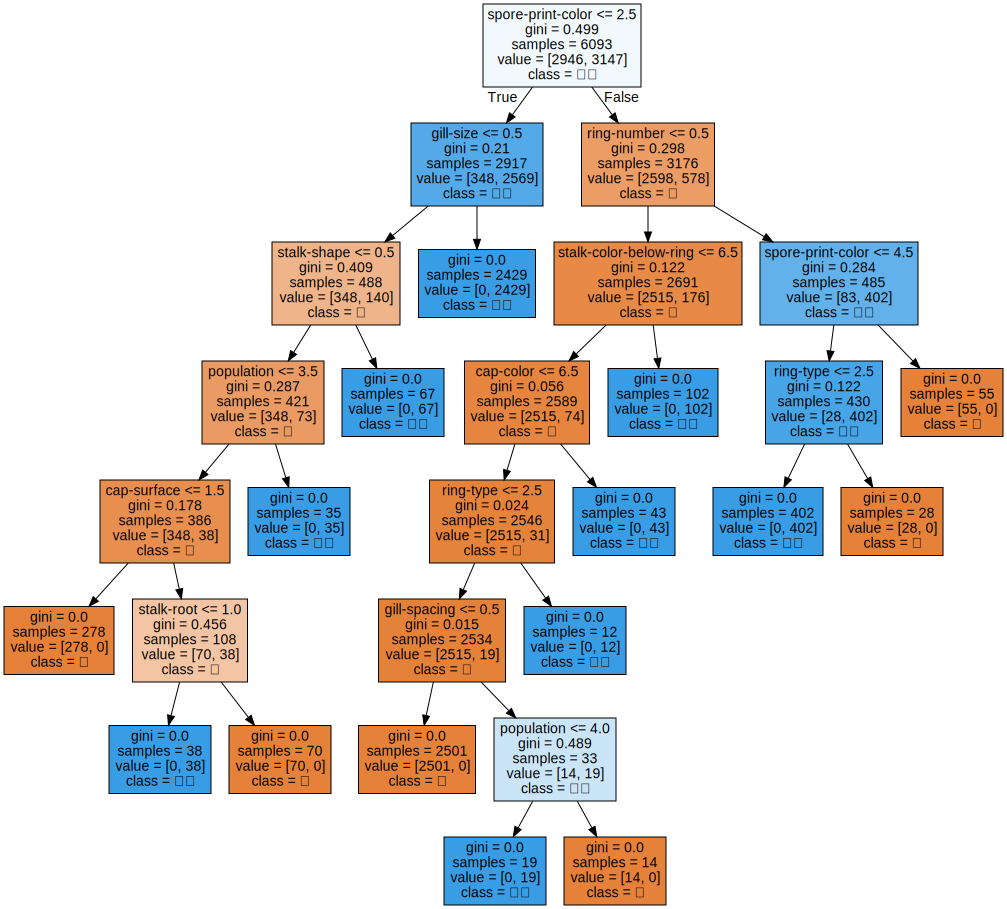

In [59]:
export_graphviz(model, out_file='mushroom_tree.dot',
                class_names = ['독','식용'],
                feature_names = X.columns,
                impurity = True,
                filled = True)

with open('mushroom_tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

<BarContainer object of 20 artists>

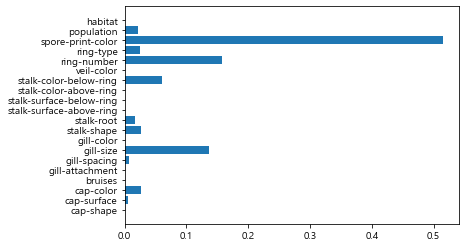

In [60]:
xlabel = X.columns
plt.barh(X.columns, model.feature_importances_)